# Income Predictions for the Upcoming Months

This notebook explores various income prediction models for the upcoming months based on historical data from 2022 to 2024. Three different prediction models are used:
- **All Days**: This model includes all days of the week, regardless of whether the restaurant is open or closed.
- **Operational Days**: This model only includes the days when the restaurant is typically open (Wednesday to Sunday).
- **Days with Income**: This model focuses solely on days where the restaurant actually generated income (y > 0).

The goal is to understand potential future income trends and provide insights to help improve business strategies.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libraries and load data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import logging
import sys

In [9]:
# Set the logger to only display error messages
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

# Redirect warnings to stderr (to suppress them if necessary)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)

# Load the income file
df_incomes = pd.read_csv('/content/drive/MyDrive/income_analysis.csv')

# Rename the columns for Prophet
df_incomes.rename(columns={'Week Date': 'ds', 'Total': 'y'}, inplace=True)

# Convert 'ds' to date format if it's not already
df_incomes['ds'] = pd.to_datetime(df_incomes['ds'])

# Create a dataframe filtering only the days the restaurant operates (Wednesday to Sunday)
df_operational = df_incomes[df_incomes['ds'].dt.day_name().isin(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])]

## Prediction Model: All Days

This prediction includes all days of the week, including those where the restaurant is normally closed (Monday and Tuesday). It provides a holistic view of potential earnings while accounting for days with no income, helping to estimate possible losses on closed days.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

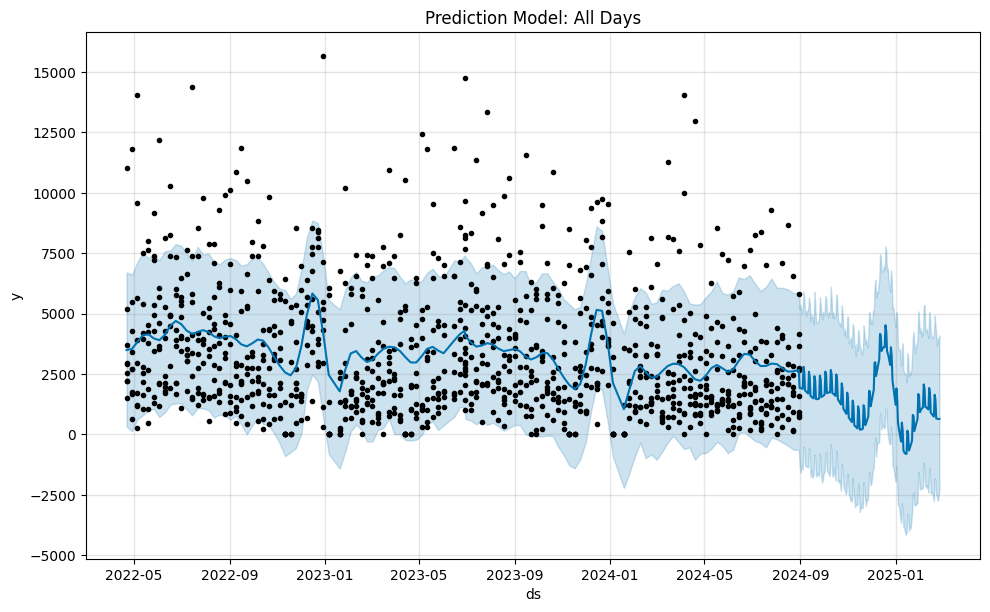

Prediction Model: All Days:
            ds        yhat   yhat_lower   yhat_upper
297 2025-02-22  662.580477 -2503.272091  4119.790347
298 2025-02-23  648.675479 -2584.090416  3667.606403
299 2025-02-24  641.108700 -2753.905903  3994.749997
300 2025-02-25  639.858390 -2594.772202  3793.911699
301 2025-02-26  644.749802 -2287.535200  4098.775422


In [10]:
# Model 1: Including all days (Graph 1)
model_all_days = Prophet()
model_all_days.fit(df_incomes)

# Create a dataframe with future dates you want to predict (180 days = 6 months)
future_all_days = model_all_days.make_future_dataframe(periods=180)

# Make the predictions
forecast_all_days = model_all_days.predict(future_all_days)

# Visualise the forecast
plt.figure(figsize=(10, 6))
model_all_days.plot(forecast_all_days)
plt.title("Prediction Model: All Days")
plt.show()

# Display the predictions for the coming months for both models
print("Prediction Model: All Days:")
print(forecast_all_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

## Prediction Model: Operational Days

This model focuses on the days when the restaurant is typically open (Wednesday to Sunday). It offers a more accurate representation of the actual income trends on operational days.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

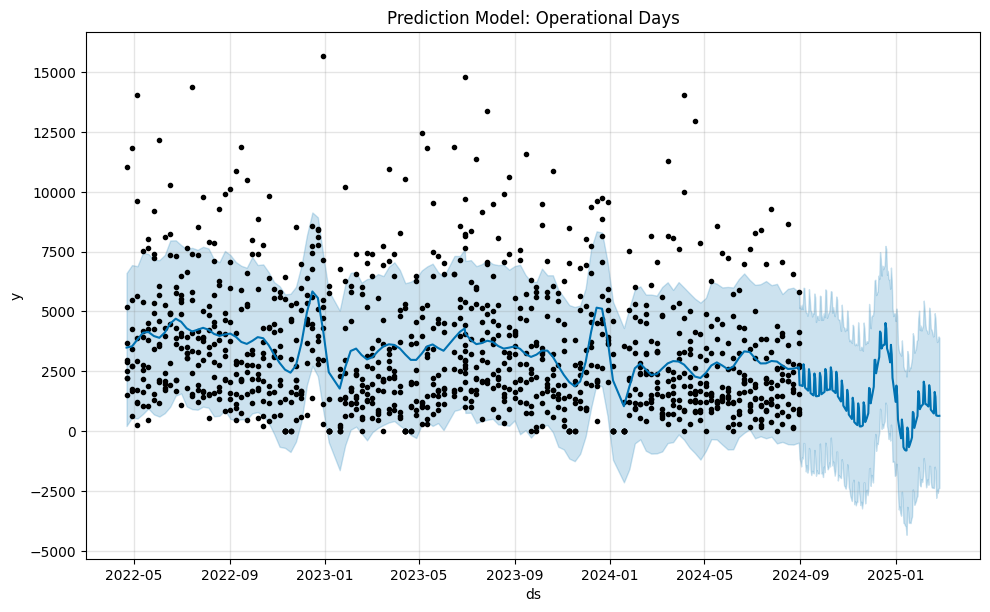

\Prediction Model: Operational Days:
            ds        yhat   yhat_lower   yhat_upper
297 2025-02-22  662.580477 -2777.019115  4003.008855
298 2025-02-23  648.675479 -2441.707950  3725.115607
299 2025-02-24  641.108700 -2575.737024  3769.805379
300 2025-02-25  639.858390 -2387.183688  3958.180977
301 2025-02-26  644.749802 -2364.612567  3900.803098


In [11]:
# Model 2: Operational days only (Graph 2)
model_operational_days = Prophet()
model_operational_days.fit(df_operational)

# Create a dataframe with future dates
future_operational_days = model_operational_days.make_future_dataframe(periods=180)

# Make the predictions
forecast_operational_days = model_operational_days.predict(future_operational_days)

# Visualise the forecast
plt.figure(figsize=(10, 6))
model_operational_days.plot(forecast_operational_days)
plt.title("Prediction Model: Operational Days")
plt.show()

print("\Prediction Model: Operational Days:")
print(forecast_operational_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

## Prediction Model: Days with Income (y > 0)

This model represents only the days where the restaurant generated income. It excludes regular closing days and days without revenue. This provides a clean view of the days that are financially active, making it easier to predict real earnings.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


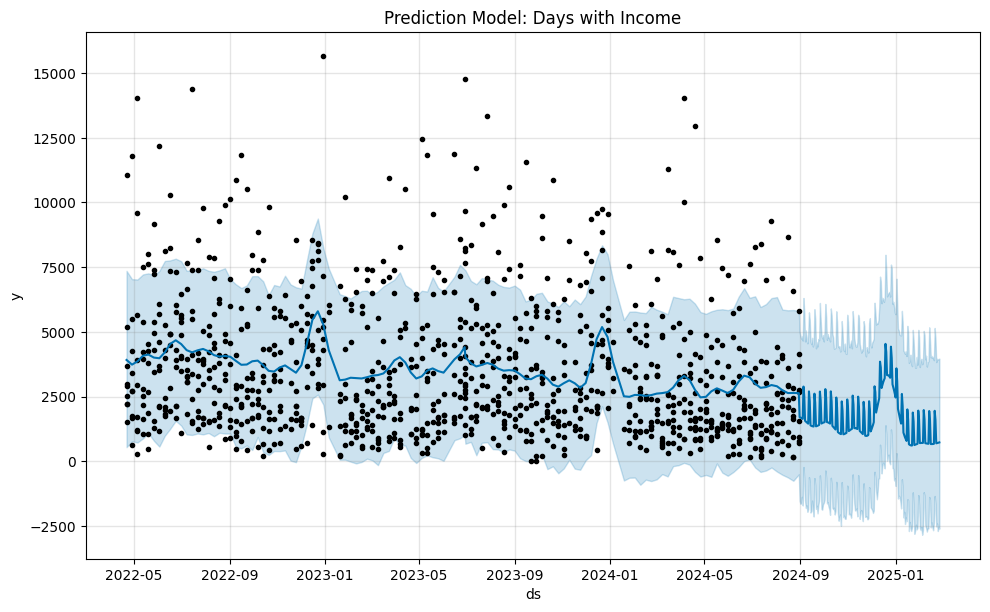

Prediction Model: Days with Income:
            ds        yhat   yhat_lower   yhat_upper
297 2025-02-22  689.783215 -2521.914993  3829.815088
298 2025-02-23  698.336222 -2410.667299  3958.992701
299 2025-02-24  707.281852 -2700.110754  3926.539284
300 2025-02-25  716.317779 -2560.876048  3950.591917
301 2025-02-26  725.152912 -2610.124056  3965.165126


In [12]:
# Filter only the days with income (y > 0)
df_incomes_with_revenue = df_incomes[df_incomes['y'] > 0]

# Create the model for days with income
model_with_revenue = Prophet()
model_with_revenue.fit(df_incomes_with_revenue)

# Create a dataframe with future dates to predict (180 days = 6 months)
future_with_revenue = model_with_revenue.make_future_dataframe(periods=180)

# Make the predictions
forecast_with_revenue = model_with_revenue.predict(future_with_revenue)

# Plot the predictions for the days with income
model_with_revenue.plot(forecast_with_revenue)
plt.title("Prediction Model: Days with Income")
plt.show()

print("Prediction Model: Days with Income:")
print(forecast_with_revenue[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

## Comparison of Predictions from the Three Models

In this graph, the predictions from the three models (All Days, Operational Days, and Days with Income) are overlaid for a clearer comparison. Each line represents a different approach to forecasting the restaurant’s income, allowing us to observe how the inclusion or exclusion of certain days impacts the predicted trends.

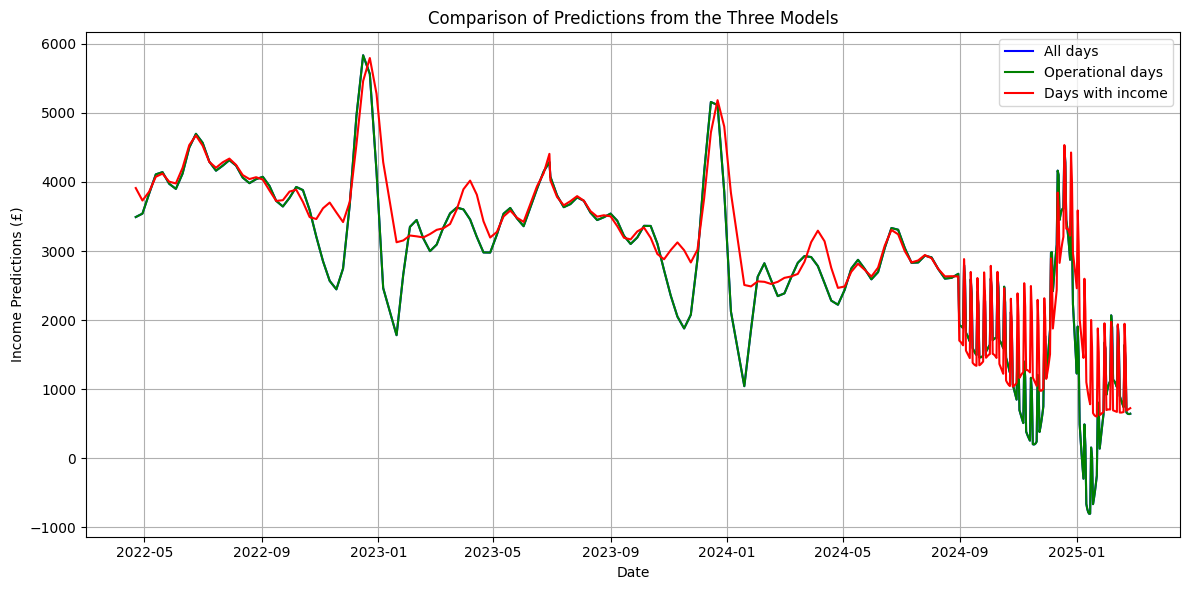

In [13]:
# Overlay the predictions from the three models
plt.figure(figsize=(12, 6))

# Plot the three prediction lines
plt.plot(forecast_all_days['ds'], forecast_all_days['yhat'], label='All days', color='blue')
plt.plot(forecast_operational_days['ds'], forecast_operational_days['yhat'], label='Operational days', color='green')
plt.plot(forecast_with_revenue['ds'], forecast_with_revenue['yhat'], label='Days with income', color='red')

# Add legend, title, and labels
plt.title('Comparison of Predictions from the Three Models')
plt.xlabel('Date')
plt.ylabel('Income Predictions (£)')
plt.legend()

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

Based on the predictions made by the three models, the following insights can be drawn:
- **All Days Model**: Provides a complete overview of the restaurant’s performance, including days when the restaurant is closed, which helps in estimating potential losses.
- **Operational Days Model**: Offers a more focused prediction on days where the restaurant is expected to operate, allowing for better planning on how to maximise revenue during open days.
- **Days with Income Model**: This is the most precise representation of the restaurant's actual performance, reflecting only days with income and excluding inactive periods.

These insights can help in decision-making, such as considering whether opening on more days or adjusting operational strategies could improve overall profitability.
